Referencias Bibliografica

Capitulo 2 de Walter Enders Applied Time Series Econometrics

# Introducción

La econometría se puede utilizar para responder muchas preguntas prácticas en economía y finanzas:

- Suponga que es dueño de un negocio. ¿Cómo podría utilizar los datos de ventas mensuales de los últimos 10 años para predecir las ventas del próximo mes?
- Desea probar si se cumple la "hipótesis de ingresos permanentes". ¿Puedes ver si el gasto de consumo es una fracción relativamente constante del ingreso nacional?
- Eres un investigador financiero. Desea determinar si los precios del oro afectan los precios de las acciones, o viceversa. ¿Existe una relación entre estas variables? Si es así, ¿puedes usarlo para ganar dinero?

La respuesta a cada una de estas preguntas requiere aparatos estadísticos ligeramente diferentes, pero todos se encuentran bajo el paraguas de la "econometría de series de tiempo".

<font color=blue>¿Por qué la econometría de series de tiempo es diferente?</font>

Considere las diferencias en los dos paneles de la figura 1. El panel (a) muestra datos transversales y el panel (b) muestra datos de series temporales. La econometría de las _secciones transversales_, se basa en el hecho de que las observaciones son independientes. Si tomamos una muestra de personas y preguntamos si están desempleadas hoy, obtendremos una mezcla de respuestas. Y a pesar de que podríamos estar en un período particularmente malo en la economía, es probable que el estado de desempleo de una persona no afecte la de otra persona. Pero si estamos enfocados en la tasa de desempleo, año tras año, entonces el desempeño de este año probablemente esté influenciado por la economía del año pasado. Las observaciones en _series temporales_ casi __nunca son independientes__. Por lo general, una observación se correlaciona con la observación anterior.

<img src="fig1.png">[1](#Notas)


## Notación

Las variables aleatorias se denotarán con letras mayúsculas (X, Y, Z). Las realizaciones particulares de la variable aleatoria tomarán letras minúsculas (x, y, z). El valor de X en un período de tiempo particular t, se denominará $X_t$ o $x_t$. Los parámetros desconocidos se denotarán con letras griegas como: $\beta$, $\gamma$, $\mu$. Las estimaciones de estos parámetros se denotarán con la notación $\hat{}$ (ej: $\hat{\beta}$). A veces hablaremos de un __lag operator__, que pensarse como una funcion que rezage el valor de la variable $X_t$ y le da el valor de $X_{t−1}$.



# Importar librerias

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa as tsa
import matplotlib.pyplot as plt 
%matplotlib inline

tsa.arima_process.arma_impulse_response

<function statsmodels.tsa.arima_process.arma_impulse_response(ar, ma, leads=100)>

# Procesos ARMA(p,q)

## Introduccion

Tomado de Levendis, 2018

*Por muchos años los economistas deseaban modelar la economia en su conjunto. Uno con cientos de ecuaciones de oferta y demanda. Un sistema de oferta y demanda para cada insumo, bienes intermedio y producto final. Uno solo necesitaría estimar las elasticidades relevantes y algunos parámetros simples para construir una bola de cristal económica. Sería capaz de hacer pronósticos precisos y prescripciones de políticas útiles. La mayoría de los economistas deseaban esto en un momento. Sin embargo, lentamente, la era del optimismo en el pronóstico macroeconómico estructural durante las décadas de 1950 y 1960 se convirtió en una era de dudas durante las décadas de 1970 y 1980.

*La Comisión Cowles tipificó el enfoque de sistemas de ecuaciones a gran escala para el pronóstico macroeconómico. Fundada en 1932 y actualmente en la Universidad de Yale, cuenta con el personal de los mejores y más brillantes economistas y estadísticos. Tres economistas obtuvieron sus Premios Nobel por la investigación directamente asociada con el proyecto econométrico en la Comisión Cowles: Tjalling Koopmans (en 1975), Lawrence Klein (en 1980) y Trygve Haavelmo (en 1989).
En su apogeo, el modelo Cowles consistía en casi cuatrocientas ecuaciones. Durante décadas fue el método de elección para el pronóstico económico y el análisis de políticas.Pero en la década de 1970, los economistas comenzaron a tener dudas sobre la empresa. Varios factores trabajaron para terminar con el dominio del enfoque de la Comisión Cowles.

*Primero, los modelos dejaron de funcionar bien. Para repararlos, los economistas comenzaron a agregar términos ad-hoc a las ecuaciones. En segundo lugar, Lucas (1976) realizó una poderosa crítica teórica. Argumentó que los parámetros estimados para cada una de las ecuaciones no eran estructurales. Por ejemplo, podrían haber estimado que la propensión marginal al consumo, en una función de consumo lineal, era, por ejemplo, 0,80. Es decir, en promedio las personas consumen el 80% de sus ingresos. Lucas argumentó que esta podría ser la cantidad óptima de consumo debido a un conjunto particular de políticas fiscales o monetarias. Cambie la estructura tributaria y las personas cambiarán su comportamiento. Los modelos, entonces, no son útiles en absoluto para el análisis de políticas, solo para pronosticar dentro de un régimen de políticas invariable.

*Tercero, una serie de documentos revelaron que los modelos econométricos a gran escala fueron superados por modelos mucho más simples. Estos modelos simples, llamados modelos ARIMA. Naylor y col. (1972) descubrieron que ARIMA superó en un 50% el modelo más complejo de Wharton al pronosticar el PNB, desempleo, inflación e inversión. Cooper (1972) comparó modelos AR aún más simples con la capacidad de pronóstico de siete modelos líderes a gran escala. Para casi todas las treinta y una variables que examinó, los modelos más simples fueron superiores.

*Nelson (1972) examinó críticamente el desempeño de un modelo a gran escala desarrollado conjuntamente por el Banco de la Reserva Federal, el MIT y la Universidad de Pennsylvania. Para 1972, el modelo FRB-MIT-Penn utilizaba 518 parámetros para investigar 270 variables económicas (Ando et al. 1972). De hecho, Nelson demostró que este modelo complejo fue superado por el más simple de los modelos de series temporales.

Un modelo ARIMA se compone de dos componentes: un modelo autorregresivo (AR) y un modelo de media móvil (MA). Ambos se basan en datos anteriores para ayudar a predecir resultados futuros. Los modelos AR y MA son los componentes básicos de todo nuestro trabajo futuro en este curso. 

### Estacionariedad

Para utilizar los modelos AR y MA, los datos deben ser "estacionarios". Suponga que tiene una serie de tiempo en una variable, $X$, que está indexada por un subíndice de tiempo $t$, de modo que $X_t$ = $X_0$, $X_1$, $X_2$, etc. Entonces $X$ es "estacionario en media" si el valor esperado de X en un momento particular no depende del período de tiempo particular en el que se observa. Por lo tanto, la expectativa incondicional de X no es una función del período de tiempo t:

$E(X_t) = E(X_1) = E(X_2) = ... = E(X)= μ$

Del mismo modo, se dice que X tiene"varianza estacionaria" si su varianza no es una función del tiempo, de modo que:

$Var(X_t) =Var(X_1) = Var(X_2) = ... = Var(X)= \sigma^2$

<img src="fig2.png">

La figura previa ilustra una serie temporal que es estacionaria media (vuelve a su valor promedio) pero no es estacionaria (su varianza fluctúa con el tiempo con períodos de alta volatilidad y baja volatilidad).

Finalmente, X es "covarianza estacionaria" si la covarianza de X con sus propios valores rezagados depende solo de la longitud del rezago, pero no del período de tiempo específico ni de la dirección del rezago. Simbólicamente, para un rezago,

$Cov(X_t, X_{t + 1}) = Cov(X_{t − 1}, X_t)$

y para todas las longitudes de rezago de k,

$Cov(X_t, X_{t + k}) = Cov(X_{t + 1}, X_{t + k + 1}) = Cov (X_{t − 1}, X_{t + k − 1})$

Un ejemplo de una serie temporal que no es covarianza estacionaria es aquella en la que hay estacionalidad, con el tamaño de la estacionalidad fluctuando con el tiempo.

<img src="fig3.png">


La figura 3 ilustra un ejemplo diferente de una serie temporal que no es covarianza estacionaria. En este ejemplo, cada valor de X está débilmente correlacionado con su valor anterior, al menos en los tercios primero y final del conjunto de datos. Sin embargo, en el tercio medio, cada valor de X está perfectamente correlacionado con su valor anterior. Esto implica que su varianza tampoco es estacionaria, ya que la varianza en el tercio medio es cero.

### Un proceso puramente aleatorio

Suponga que usted es el gerente de un casino, y uno de sus trabajos es rastrear y predecir el flujo de efectivo hacia y desde el casino. ¿Cuánto efectivo tendrá a mano el martes de la próxima semana? Supongamos que tiene datos diarios que se remontan a los últimos 1000 días.

Deje que Xt denote el flujo neto de efectivo en el casino el día t. ¿Podemos predecir el flujo de caja de mañana $X_{t + 1}$, dado lo que sucedió hoy $X_t$, ayer $X_{t − 1}$ y antes? Considere un modelo de la siguiente forma 

$X_t = e_t$

donde los errores se distribuyen normalmente con media de cero y varianza de uno, $e_t \sim iidN(0,1)$ en todos los periodos de tiempo. En otras palabras, **X es solo un error aleatorio puro**. Este no es un modelo muy útil, ni siquiera preciso, de los flujos de efectivo de un casino, pero es un punto de partida útil pedagógicamente. El flujo de caja de cada día es completamente independiente del flujo de los días anteriores y, además, la cantidad de dinero que ingresa al casino se compensa, en promedio, por la salida de efectivo. En otras palabras, el flujo de efectivo promedio es cero. Es decir,

$E(X_t) = E(e_t) = 0$

ya que la media de $e_t$ es cero para todo t. Este proceso es estacionario medio: el valor esperado de X es cero, sin importar en qué período de tiempo estemos. Este proceso también es estacionario, porque $V(X_t) = V(e_t) = 1$ para todo t. Y dado que los $X_t's$ son solo sorteos independientes de la misma distribución, no están correlacionados entre sí; así, $Cov(X_t , X_{t − k}) = 0$ haciendo que la covarianza X sea estacionaria.

Ejemplo: $X_t=\beta_0+e_t$, es estacionario?

# Modelo AR(1)

Considere, ahora, un tipo diferente de modelo:

$X_t = \beta_1 X_{t-1} + e_t$

La realización actual de X depende del valor de la parte X del último período más algún error aleatorio. Si tuviéramos que estimar este modelo, retrocederíamos X en sí mismo (retrasado un período). Es por esto que el modelo se llama "modelo autorregresivo con un rezago" o "AR (1)" para abreviar. Una autorregresión es una regresión de una variable en sí misma.

## Estimación de un modelo AR (1)

Uno de los atractivos de los modelos AR es que son bastante fáciles de estimar. Un modelo AR (1) consiste en X regresado en su primer retraso. Como se expresa en la ecuación previa. No hay una constante en el modelo.

### Ejemplo PIB Ecuador

In [2]:
# Importar data
df1 = pd.read_csv(r'CTASTRIM110.csv',header=0, parse_dates=True,squeeze=True)
df1.index = pd.period_range('2000Q1', '2019Q4', freq='Q')

In [3]:
df1.tail(10)

,year,quarter,datetime,agricultura,acuicultura y camaron,pesca,petroleo y minas,refinacion petroleo,manufactura,electricidad y agua,construccion,servicios financieros,pib,Unnamed: 13
2017Q3,2017,3,2017q3,1401927,194346,109178,1691619,167118,2071107,493213,1539551,592753,17819405,0.007545
2017Q4,2017,4,2017q4,1426246,203130,108448,1650212,161840,2086730,513356,1536344,594244,17952383,0.007463
2018Q1,2018,1,2018q1,1413785,200556,108472,1540581,160965,2078652,516112,1565406,577019,17762564,-0.010573
2018Q2,2018,2,2018q2,1391186,201055,114906,1546777,159595,2092999,514067,1574345,591447,17943194,0.010169
2018Q3,2018,3,2018q3,1366476,202366,114688,1590233,174837,2096726,514090,1553522,613985,18080826,0.007670
2018Q4,2018,4,2018q4,1369397,210752,113114,1581110,156829,2095890,498388,1501173,623886,18083933,0.000172
2019Q1,2019,1,2019q1,1394325,222482,117164,1582616,139184,2109667,545837,1476298,621668,17957733,-0.006979
2019Q2,2019,2,2019q2,1388267,230124,120455,1602148,125218,2132482,568869,1469861,632152,18028980,0.003967
2019Q3,2019,3,2019q3,1369858,229922,123511,1640124,132795,2141289,543705,1477438,633668,18022042,-0.000385
2019Q4,2019,4,2019q4,1391576,230959,108645,1582924,121985,2106138,575251,1451078,638864,17900370,-0.006751


In [4]:
# Numero de observaciones
# df.shape
len(df1)

80

In [5]:
# Definir varibles
pib = df1['pib']
pib

2000Q1     9134587
2000Q2     9320414
2000Q3     9548491
2000Q4     9722918
2001Q1     9699363
            ...   
2018Q4    18083933
2019Q1    17957733
2019Q2    18028980
2019Q3    18022042
2019Q4    17900370
Freq: Q-DEC, Name: pib, Length: 80, dtype: int64

In [6]:
pib.describe()
# df['pib'].describe()

count    8.000000e+01
mean     1.420461e+07
std      2.987334e+06
min      9.134587e+06
25%      1.173623e+07
50%      1.382472e+07
75%      1.732823e+07
max      1.808393e+07
Name: pib, dtype: float64

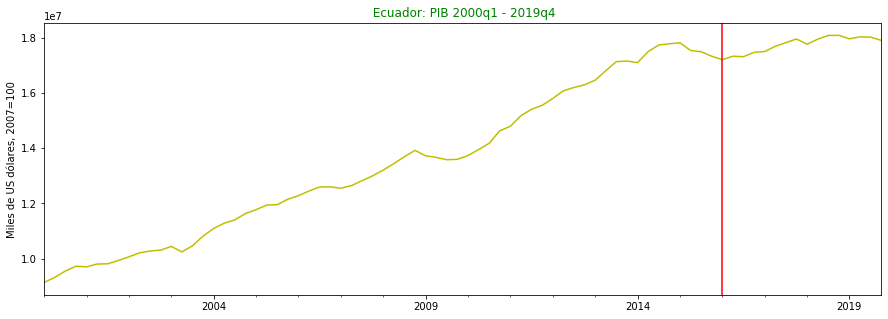

In [7]:
pib.plot(figsize=(15, 5),c='y')
plt.title(' Ecuador: PIB 2000q1 - 2019q4', c='g') 
plt.ylabel('Miles de US dólares, 2007=100') 
plt.axvline(x='2016-02-01',c='r')
# plt.axvline(x='2015-03-01',c='r')

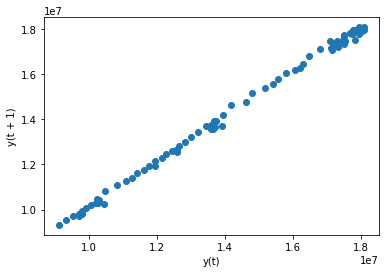

In [8]:
pd.plotting.lag_plot(pib)

### Ejemplo IPC Ecuador

In [9]:
df2 = pd.read_csv(r'..\Talleres\ipc_ecu.csv',header=0)
df2.index = pd.period_range('2000-01', '2020-05', freq='M')

In [10]:
df2.head()

,year,month,ipc
2000-01,2000,1,27.68
2000-02,2000,2,30.46
2000-03,2000,3,32.77
2000-04,2000,4,36.11
2000-05,2000,5,37.97


In [11]:
ipc = df2['ipc']

Text(0, 0.5, 'Base 2014=100')

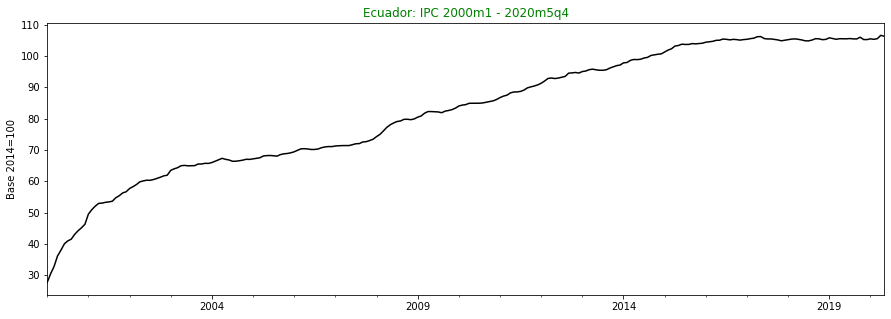

In [12]:
ipc.plot(figsize=(15, 5),c='k')
plt.title('Ecuador: IPC 2000m1 - 2020m5q4', c='g') 
plt.ylabel('Base 2014=100') 
# plt.axvline(x='2013-03-01',c='r')
# plt.axvline(x='2015-03-01',c='r')

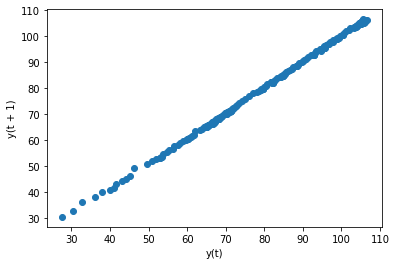

In [13]:
pd.plotting.lag_plot(ipc)

### Ejemplo IPC US

In [14]:
macrodata = sm.datasets.macrodata.load_pandas().data
macrodata.index = pd.period_range('1959Q1', '2009Q3', freq='Q')
endog = macrodata['infl']

In [15]:
macrodata.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


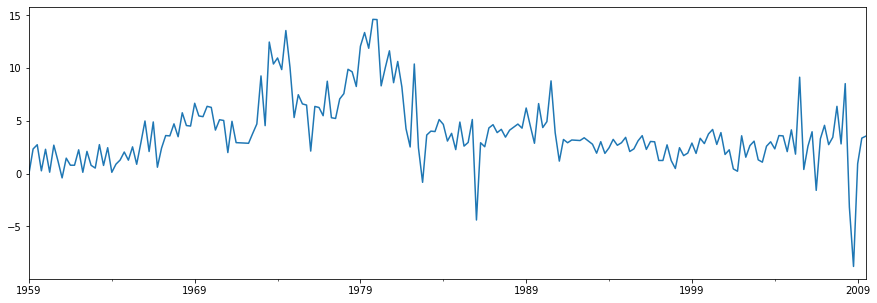

In [16]:
endog = macrodata['infl']
endog.plot(figsize=(15, 5))

In [17]:
# Generar el modelo
model = sm.tsa.SARIMAX(endog, order=(1,0,0), trend='c')

# Estimar los parametros del modelo
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                   infl   No. Observations:                  203
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -456.076
Date:                Tue, 23 Jun 2020   AIC                            920.151
Time:                        13:57:05   BIC                            933.404
Sample:                    03-31-1959   HQIC                           925.513
                         - 09-30-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2438      0.156      1.558      0.119      -0.063       0.551
ar.L1          0.9340      0.030     31.179      0.000       0.875       0.993
ma.L1         -0.5755      0.055    -10.556      0.0

In [18]:
type(results.resid)

pandas.core.series.Series

## Funcion Impulso Respuesta

Si se sabe que una serie temporal X es, o está bien representada por, un proceso $AR(1)$, entonces podríamos preguntarnos: ¿Cómo responde X a los shcoks? ¿Se amortigua con el tiempo o el efecto del shock es persistente? Es decir, es posible que deseemos saber cómo X responde a un shock en el tiempo. O, en el lenguaje del análisis de series de tiempo, **¿cuál es la función de respuesta al impulso de X (o impulso-respuesta)?** Una función de respuesta al impulso (FIR) rastrea el efecto de un choque articular (por ejemplo, $e_0$) en $X_0$, $X_1$, $X_2$ y los valores posteriores.

Supongamos que $e$ recibe un shock único de una unidad en el período t; es decir, $e_t = 1$ en el período t solamente.

$Xt = 0.75X_{t − 1} + e_t = 0.75 (0) + 1 = 1$

¿Cómo afectará este shock los valores posteriores de Xt? 

$X_{t + 1} = 0.75 X_t + e_{t + 1} = 0.75 (1) + 0 = 0.75$

$X_{t + 2} = 0.75 X_{t + 1} + e_{t + 2} = 0.75 (0.75) + 0 = 0.75^2$

$X_{t + 3} = 0.75 X_{t + 2} + e_{t + 3} = 0.75 (0.75)^2 + 0 = 0.75^3$

$X_{t + 4} = 0.75 X_{t + 3} + e_{t + 4} = 0.75 (0.75)^3 + 0 = 0.75^4$

Por lo tanto, podemos ver que un shock de una sola unidad en X tiene una persistencia, pero decae exponencialmente. 
Es importante notar que el shock de una unidad  podría haber sido de cualquier tamaño que quisiéramos considerar. Una opción más común sería para medir el efecto de un shock de desviación estándar (de X).

In [19]:
FIR=tsa.arima_process.arma_impulse_response([1.0, -0.8546], [1.], leads=10)
print(FIR)

[1.         0.8546     0.73034116 0.62414956 0.53339821 0.45584211
 0.38956267 0.33292026 0.28451365 0.24314537]


Text(0.5, 0, 'Tiempo')

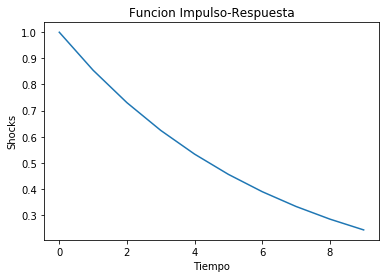

In [20]:
plt.plot(FIR)
plt.title('Funcion Impulso-Respuesta') 
plt.ylabel('Shocks') 
plt.xlabel('Tiempo')

## Pronostico (forecast)

Supongamos que $X_t = 0.75X_{t − 1} + e_t$. Usualmente no sabemos cuáles son los términos de error, tenemos que estimarlos a través de los residuos, pero supongamos que los conocemos para que podamos entender mejor
cómo evoluciona la variable $X_t$. Por ejemplo, supongamos que X0 = 100 y que
los primeros cuatro términos de error, extraídos de una distribución $N(0, 100)$, resultan ser $e_t =
[20, -30, 10, 15]$. Entonces los siguientes cuatro valores de $Xt$ son:

$X_1 = 0.75X_0 + e_1 = 0.75 (100) + 20 = 95$

$X_2 = 0.75X_1 + e_2 = 0.75 (95) - 30 = 41.25$

$X_3 = 0.75X_2 + e_3 = 0.75 (41.25) + 10 = 40.9375$

$X_4 = 0.75X_3 + e_4 = 0.75 (40.9375) + 15 = 45.7031$

Pronosticando más allá de donde tenemos datos, solo podemos comentar sobre lo esperado valor de $X_5$, condicional a todos los datos anteriores:

$
\begin{eqnarray}
E(X_5| X_4, X_3,...) &=& E (0.75X_4 + e_5 | X_4, X_3,...)\\
&=& E(0.75(45.7031) + e_5 | X_4, X_3,...)\\
&=& E(34.27725 + e_5 | X_4, X_3,...)\\
&=& 34.27725 + E(e_5 | X_4, X_3,...)
\end{eqnarray}
$

Dado que $et \sim iidN (0, 1)$, entonces su expectativa es cero, entonces $E(X_5 | X_4, X_3,...) = 34.27725 + 0 = 34.27725$.
¿Qué pasa si quisiéramos predecir X dos períodos? En otras palabras, ¿qué pasa si ¿tenía datos solo hasta el tiempo t = 4 y quería predecir X6? En símbolos, calcule: $E(X_6|X_4, X_3...)$. El truco es alimentar el pronóstico en sí mismo:

$
\begin{eqnarray}
E (X_6 | X_4, X_3...) &=& E (\beta X_5 + e_6| X_4, X_3...)\\
&=& \beta E(X_5| X_4, X_3...) + E(e_6| X_4, X_3...)\\
&=& 0,75 (34,27725) + E(0)\\
&=& 25.7079
\end{eqnarray}
$

Repitiendo el procedimiento, el pronóstico de 2 períodos de X es

$
\begin{eqnarray}
E (X_{t + 2} | X_t, X_{t − 1},...) &=& E (\beta (\beta X_t + e_t + 1) + e_t + 2)\\
&=& \beta  \beta X_t + \beta E(e_{t + 1}) + E(e_{t + 2})\\
&=& \beta ^2X_t + \beta (0) + 0\\
&=& \beta ^2X_t
\end{eqnarray}
$


Aún más generalmente, dados los datos hasta el período t, podemos esperar que el valor de $X_{t + a}$, es decir, un período por delante, será $E (X_{t + a} | X_t, X_{t − 1},...) = \beta^aX_t$. Desde $\mid\beta\mid<1$, esto significa que el pronóstico de un período por delante es una fracción de
valor X de hoy. El pronóstico dos períodos por delante es el doble; los tres períodos
El pronóstico anticipado es aún más pequeño. En el límite, se espera que X finalmente converja a
su media que, en este caso, es igual a cero.

### Pronostico un solo periodo hacia adelante

In [21]:
results.forecast()

2009Q4    2.242634
Freq: Q-DEC, dtype: float64

In [22]:
# Aqui se construye un objeto mas completo para obtener pronostico
fcast_res1 = results.get_forecast()

#La mayoría de los resultados se recopilan en el atributo `summary_frame`.
#Aquí especificamos que queremos un nivel de confianza del 95% (default)
print(fcast_res1.summary_frame(alpha=0.05))

infl        mean   mean_se  mean_ci_lower  mean_ci_upper
2009Q4  2.242634  2.282966      -2.231898       6.717166


### Pronosticos de mas periodos

In [23]:
results.forecast(steps=12)

2009Q4    2.242634
2010Q1    2.338384
2010Q2    2.427812
2010Q3    2.511336
2010Q4    2.589344
2011Q1    2.662202
2011Q2    2.730249
2011Q3    2.793803
2011Q4    2.853161
2012Q1    2.908600
2012Q2    2.960378
2012Q3    3.008737
Freq: Q-DEC, dtype: float64

In [24]:
fcast_res2 = results.get_forecast(steps=12)

print(fcast_res2.summary_frame())

infl        mean   mean_se  mean_ci_lower  mean_ci_upper
2009Q4  2.242634  2.282966      -2.231898       6.717166
2010Q1  2.338384  2.425254      -2.415027       7.091796
2010Q2  2.427812  2.542880      -2.556140       7.411765
2010Q3  2.511336  2.641210      -2.665341       7.688012
2010Q4  2.589344  2.724087      -2.749769       7.928457
2011Q1  2.662202  2.794375      -2.814672       8.139076
2011Q2  2.730249  2.854274      -2.864025       8.324524
2011Q3  2.793803  2.905516      -2.900904       8.488510
2011Q4  2.853161  2.949488      -2.927729       8.634051
2012Q1  2.908600  2.987316      -2.946432       8.763632
2012Q2  2.960378  3.019927      -2.958570       8.879326
2012Q3  3.008737  3.048089      -2.965407       8.982881


In [25]:
print(results.forecast('2011Q2'))

2009Q4    2.242634
2010Q1    2.338384
2010Q2    2.427812
2010Q3    2.511336
2010Q4    2.589344
2011Q1    2.662202
2011Q2    2.730249
Freq: Q-DEC, dtype: float64


In [26]:
fcast_res3 = results.get_forecast('2014Q2')
print(fcast_res3.summary_frame())

infl        mean   mean_se  mean_ci_lower  mean_ci_upper
2009Q4  2.242634  2.282966      -2.231898       6.717166
2010Q1  2.338384  2.425254      -2.415027       7.091796
2010Q2  2.427812  2.542880      -2.556140       7.411765
2010Q3  2.511336  2.641210      -2.665341       7.688012
2010Q4  2.589344  2.724087      -2.749769       7.928457
2011Q1  2.662202  2.794375      -2.814672       8.139076
2011Q2  2.730249  2.854274      -2.864025       8.324524
2011Q3  2.793803  2.905516      -2.900904       8.488510
2011Q4  2.853161  2.949488      -2.927729       8.634051
2012Q1  2.908600  2.987316      -2.946432       8.763632
2012Q2  2.960378  3.019927      -2.958570       8.879326
2012Q3  3.008737  3.048089      -2.965407       8.982881
2012Q4  3.053903  3.072443      -2.967975       9.075781
2013Q1  3.096087  3.093531      -2.967123       9.159298
2013Q2  3.135486  3.111810      -2.963550       9.234522
2013Q3  3.172283  3.127667      -2.957832       9.302399
2013Q4  3.206651  3.141434     

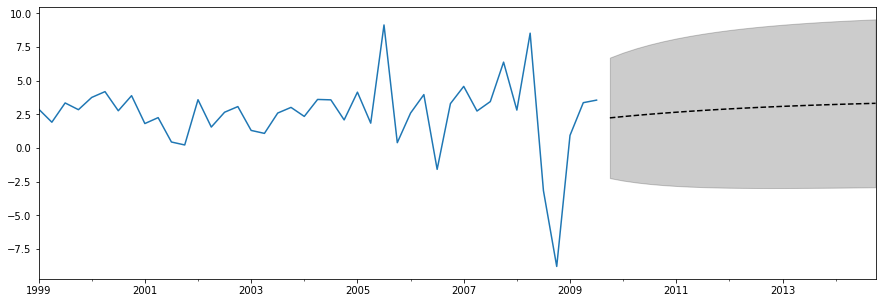

In [27]:
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the data (here we are subsetting it to get a better look at the forecasts)
endog.loc['1999':].plot(ax=ax)

# Construct the forecasts
fcast = results.get_forecast('2014Q4').summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.20);


In [28]:
type(fcast)

pandas.core.frame.DataFrame

### Predicción vs Pronóstico

Los objetos de resultados también contienen dos métodos que sirven tanto para valores ajustados dentro de la muestra como para pronósticos fuera de la muestra. Son **predict** y **get_prediction**. El método de predicción solo devuelve predicciones de puntos (similar al pronóstico), mientras que el método get_prediction también devuelve resultados adicionales (similar a get_forecast).

En general, si su interés es el pronóstico fuera de la muestra, es más fácil atenerse a los métodos de pronóstico y get_forecast.

## Modelo AR(1) con intercepto

Considere un proceso AR (1) estacionario con un término constante adicional, $\beta_0$:

$X_t = \beta_0 + \beta_1X_{t − 1} + e_t$

Tomando expectativas de ambos lados, tenemos

$
\begin{eqnarray}
E(X_t) &=& E(\beta_0 + \beta_1X_{t − 1} + e_t)\\
&=& \beta_0 + E (\beta_1X_{t − 1}) + E (e_t)\\
&=& \beta_0 + \beta_1E (X_{t − 1})
\end{eqnarray}
$

La media de estacionariedad (es decir, $E(X_t) = E(X_{t − 1})$) nos permite agrupar términos y simplificar
más lejos,

$
\begin{eqnarray}
E (X_t) - \beta_1 E(X_t) &=& \beta_0\\
E (X_t) (1 -  \beta_1) &=& \beta_0\\
E (X_t) &=& \frac{\beta_0}{1 - \beta_1}\\
\end{eqnarray}
$

La media de un proceso AR es proporcional a la constante, pero también está influenciada por la correlación de X con sus propios valores rezagados. ¿Cuál es la varianza de un proceso AR (1) distinto de cero?

$
\begin{eqnarray}
Var(X_t) &=& Var(\beta_0 + \beta_1 X_{t − 1} + e_t)\\
&=& Var(\beta_0 ) + Var(\beta_1X_{t − 1}) + Var(e_t)\\
&=& 0 + \beta_1^2Var(X_{t − 1})+1
\end{eqnarray}
$

Por estacionariedad $Var(X_t) = Var(X_{t−1})$, tenemos:

$
\begin{eqnarray}
Var(X_t) &=& \beta_1^2Var(X_{t})+1\\
Var(X_t) &=& \frac{1}{1-\beta_1^2}
\end{eqnarray}
$

# Modelo MA(1)

Los modelos ARMA se componen de dos partes, la segunda de las cuales se llama Moving Modelo promedio (o "MA"). Los modelos AR tenían X autocorrelacionadas porque X actual dependía directamente de los valores rezagados de los modelos X. MA, por otro lado tienen X autocorrelacionadas porque los errores están, en sí mismos, autocorrelacionados.

El tipo más simple de modelo MA es:

$
\begin{eqnarray}
X_t &=& e_t\\
e_t &=& u_t + \beta u_t − 1 \\
u_t &\sim & iidN(\mu, \sigma^2_u)
\end{eqnarray}
$

Que se puede condensar a $X_t = u_t + \beta u_{t − 1}$ 

Será útil diferenciar entre los errores ($e_t$) de los shocks aleatorios ($u_t$). Los términos de error ($e_t$) están autocorrelacionados. Se supone que los choques ($u_t$) son blancos ruido. Es decir, cada $u_t$ se extrae de la misma distribución Normal, independientemente de todos las otras realizaciones de $u_t$ en el mismo período de tiempo; por lo tanto, decimos que los $u_ t$ son independiente e idénticamente distribuido desde una distribución Normal.
Tal modelo se llama modelo MA 1) porque el shock aparece en la ecuación $X_t = u_t + \beta u_{t − 1}$) con un retraso de uno. 

Lo importante a tener en cuenta es que en este modelo los errores tienen un efecto directo sobre X más allá del término inmediato. Tienen algo de inercia. Observe que $E(u_{t 1}u_{t − 1})$ es equivalente a $E(u_{t − 1}u_{t − 2})$ debido a la estacionariedad. También, recuerde que $u_t \sim iidN(\mu, \sigma^2_u)$ de modo que $ E(u^2_t)=\sigma^2_u$.  Como los $u_t$ son todos independientes uno del otro, entonces siempre será el caso que: $E (u_tu_j) = 0$ para todo $t \neq j$.
Dado que los errores ($e_t$) en X están autocorrelacionados, entonces X también está autocorrelacionado.

## Estimaci\'on de un modelo MA(1)

In [29]:
# Generar el modelo
model2 = sm.tsa.SARIMAX(endog, order=(0, 0, 1), trend=None)

# Estimar los parametros del modelo
results2 = model2.fit()

print(results2.summary())

                               SARIMAX Results                                
Dep. Variable:                   infl   No. Observations:                  203
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -553.007
Date:                Tue, 23 Jun 2020   AIC                           1110.014
Time:                        13:57:06   BIC                           1116.640
Sample:                    03-31-1959   HQIC                          1112.695
                         - 09-30-2009                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7037      0.046     15.136      0.000       0.613       0.795
sigma2        13.5596      1.149     11.803      0.000      11.308      15.811
Ljung-Box (Q):                      208.04   Jarque-

## Pronostico un solo periodo hacia adelante

In [30]:
# Aqui se construye un objeto mas completo para obtener pronostico
fcast_res2 = results2.get_forecast(steps=1)

#La mayoría de los resultados se recopilan en el atributo `summary_frame`.
#Aquí especificamos que queremos un nivel de confianza del 95% (default)
print(fcast_res2.summary_frame(alpha=0.05))

infl       mean  mean_se  mean_ci_lower  mean_ci_upper
2009Q4  1.69795  3.68234      -5.519304       8.915203


# Comandos útiles

In [31]:
from platform import python_version
print('Python versio is', python_version())

Python versio is 3.7.6


# Notas
1. Figura tomada de Levendis,J.D. 2018. Time Series Econometrics: Learning Through Replications.